In [1]:
import numpy as np
import pandas as pd

xl = pd.ExcelFile("/Users/Wonhee/Desktop/Georgia Tech/Fall 2017/CSE 6242 Data and Visual Analytics/Final Project/gtd_13to16_cleaned.xlsx")
df = xl.parse("Data")
df.head()


,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,propcomment,ishostkid,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,201301010001,2013,1,1,0,153,Pakistan,6,South Asia,Khyber Pakhtunkhwa,...,NaN,0,"""Explosive device defused in Bannu,"" The News ...",NaN,NaN,START Primary Collection,-9,-9,0,-9
1,201301010002,2013,1,1,0,95,Iraq,10,Middle East & North Africa,Saladin,...,Nearby homes and a fuel station were damaged i...,0,"""Deadly bombing leaves destruction in Kirkuk,""...","""Iraq bomb kills one,"" ITN, January 2, 2013.","""Deadly Iraq bombings near Kirkuk - video,"" St...",START Primary Collection,-9,-9,0,-9
2,201301010003,2013,1,1,0,95,Iraq,10,Middle East & North Africa,Saladin,...,Nearby homes and a fuel station were damaged i...,0,"""Deadly bombing leaves destruction in Kirkuk,""...","""Iraq bomb kills one,"" ITN, January 2, 2013.","""Deadly Iraq bombings near Kirkuk - video,"" St...",START Primary Collection,-9,-9,0,-9
3,201301010004,2013,1,1,0,95,Iraq,10,Middle East & North Africa,Kirkuk,...,A patrol vehicle was damaged in this attack.,0,"""2 cops wounded by explosion mid Kirkuk,"" Aswa...","""Iraqi forces arrest al-Qaeda terrorists,"" IRI...","""Policeman killed, another wounded in Kirkuk,""...",START Primary Collection,-9,-9,0,-9
4,201301010005,2013,1,1,0,153,Pakistan,6,South Asia,Sindh,...,NaN,0,"""Tragedy averted: 5kg bomb defused near po...","""BDS defuses two bombs in Orangi and Steel Tow...","""Bombs defused in Orangi, Steel Town,"" The New...",START Primary Collection,0,0,0,0


In [2]:
import sqlite3 as db
import pandasql as pdsql

pysql = lambda q: pdsql.sqldf(q, globals())
str_country = "select country_txt as Country, count(*) as Incidents from df group by Country order by Incidents desc;"
df_country = pysql(str_country)
df_country

,Country,Incidents
0,Iraq,12875
1,Afghanistan,6804
2,Pakistan,6461
3,India,3456
4,Philippines,2600
5,Yemen,2364
6,Nigeria,2226
7,Somalia,2194
8,Libya,1978
9,Egypt,1609


/Users/Wonhee/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


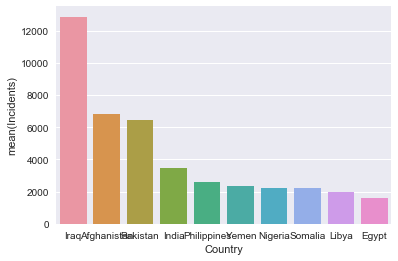

In [3]:
import seaborn as sns

# The following Jupyter "magic" command forces plots to appear inline
# within the notebook.
%matplotlib inline
sns.barplot(x = "Country", y = "Incidents", data = df_country.head(10))

In [4]:
str_region = "select region_txt as Region, count(*) as Incidents from df group by Region order by Incidents desc;"
df_region = pysql(str_region)
df_region

,Region,Incidents
0,Middle East & North Africa,23509
1,South Asia,17805
2,Sub-Saharan Africa,7287
3,Southeast Asia,4416
4,Eastern Europe,1946
5,Western Europe,1073
6,South America,769
7,North America,201
8,East Asia,92
9,Central Asia,41


/Users/Wonhee/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


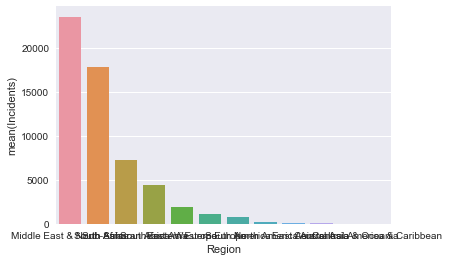

In [5]:
sns.barplot(x = "Region", y = "Incidents", data = df_region)

In [6]:
str_atktype = "select attacktype1_txt as AttackType, count(*) as Incidents from df group by AttackType order by Incidents desc;"
df_atktype = pysql(str_atktype)
df_atktype

,AttackType,Incidents
0,Bombing/Explosion,30130
1,Armed Assault,13076
2,Hostage Taking (Kidnapping),4315
3,Assassination,3504
4,Unknown,2828
5,Facility/Infrastructure Attack,2729
6,Unarmed Assault,257
7,Hostage Taking (Barricade Incident),212
8,Hijacking,145


/Users/Wonhee/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


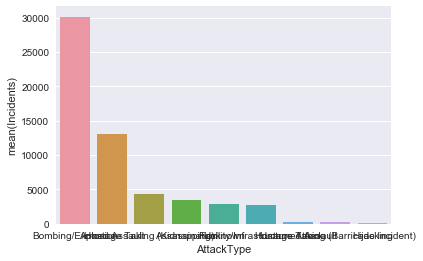

In [7]:
sns.barplot(x = "AttackType", y = "Incidents", data = df_atktype)

In [8]:
str_tgttype = "select targtype1_txt as TargetType, count(*) as Incidents from df group by TargetType order by Incidents desc;"
df_tgttype = pysql(str_tgttype)
df_tgttype

,TargetType,Incidents
0,Private Citizens & Property,14967
1,Military,11537
2,Police,8773
3,Government (General),5045
4,Business,4050
5,Unknown,3370
6,Religious Figures/Institutions,1536
7,Terrorists/Non-State Militia,1282
8,Transportation,1202
9,Educational Institution,1197


/Users/Wonhee/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


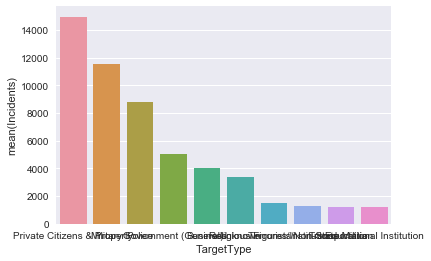

In [9]:
sns.barplot(x = "TargetType", y = "Incidents", data = df_tgttype.head(10))

In [10]:
str_natlty = "select natlty1_txt as Nationality, count(*) as Incidents from df group by Nationality order by Incidents desc;"
df_natlty = pysql(str_natlty)
df_natlty

,Nationality,Incidents
0,Iraq,12836
1,Pakistan,6326
2,Afghanistan,5921
3,India,3480
4,Philippines,2574
5,Yemen,2270
6,Nigeria,2207
7,Libya,1830
8,Somalia,1632
9,Egypt,1631


/Users/Wonhee/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


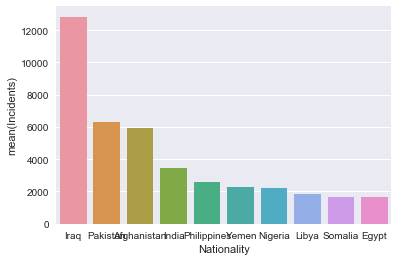

In [11]:
sns.barplot(x = "Nationality", y = "Incidents", data = df_natlty.head(10))

In [12]:
str_weaptype = "select weaptype1_txt as WeaponType, count(*) as Incidents from df group by WeaponType order by Incidents desc;"
df_weaptype = pysql(str_weaptype)
df_weaptype

,WeaponType,Incidents
0,Explosives/Bombs/Dynamite,32636
1,Firearms,16052
2,Unknown,4812
3,Incendiary,2459
4,Melee,1028
5,Chemical,83
6,Vehicle (not to include vehicle-borne explosiv...,58
7,Other,39
8,Sabotage Equipment,24
9,Biological,3


/Users/Wonhee/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


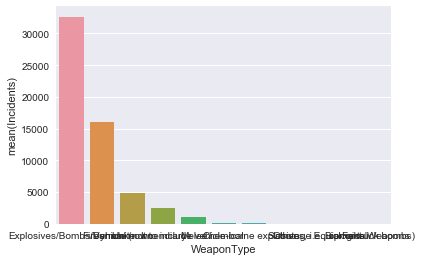

In [13]:
sns.barplot(x = "WeaponType", y = "Incidents", data = df_weaptype)